# MNIST - Handwriting Recognition


# Step 1 - Importing libraries

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt  # For data visualization
import tensorflow as tf  # For building and training neural networks
import numpy as np  # For numerical operations and arrays

# Enable inline plotting for Jupyter notebooks
%matplotlib inline


# Step 2 - Importing Dataset

Here we are loading mnist Dataset which is preloaded in tensorflow. <br>

>```mnist = tf.keras.datasets.mnist```<br>
This returns the dataset object. Similarly there are 6 more datasets preloaded in keras.

>Calling the `load_data` function on this object returns splitted train and test data in form of (features, target).

In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# Load and unpack the dataset into training and testing data
# x_train and y_train are the training features and labels respectively
# x_test and y_test are the testing features and labels respectively
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 2s 0us/step


### Overview of Dataset

The dataset contains images, each image of 28x28px. There are 6000 images in training data and 1000 images in test data.<br>
>The shape (6000, 28, 28) represents **6000** images each of dimension **28x28**.<br>
The shape **(6000, )** represents (6000, 1) shape i.e. 6000 labels, each for one image.

In [3]:
# Print the shapes of the datasets
print(f'Shape of the training data: {x_train.shape}')  # Shape of training images
print(f'Shape of the training target: {y_train.shape}')  # Shape of training labels
print(f'Shape of the test data: {x_test.shape}')  # Shape of testing images
print(f'Shape of the test target: {y_test.shape}')  # Shape of testing labels


Shape of the training data: (60000, 28, 28)
Shape of the training target: (60000,)
Shape of the test data: (10000, 28, 28)
Shape of the test target: (10000,)


In [4]:
# Print the training labels
print(y_train)

[5 0 4 ... 5 6 8]


Target variable is 5


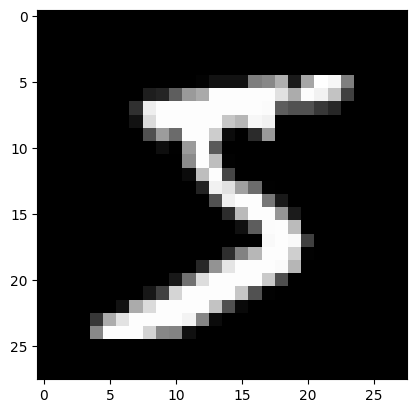

In [5]:
# Display the first image in the training data along with its target label
plt.imshow(x_train[0], cmap='gray')  # Display the image in grayscale
print(f'Target variable is {y_train[0]}')  # Print the target label of the first image


# Step 3 - Preprocessing

>```python
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
```


In these lines of code we reshape the data to feed in the Model. You can see the data reshaped to `(6000, 28, 28, 1)`. Let's see what are these numbers. `6000` is the number of images, `28, 28` is the shape of image and `1` is the number of channels in the image. **Grayscale images have 1 channel. When using colored images this can be replace by 3 i.e. (6000, 28, 28, 3) when using colored images**

The next step is Normalizing i.e. scaling the pixels to 0-1 from 0-255.

In [6]:
# Reshape the data for convolutional neural network
x_train = x_train.reshape(60000, 28, 28, 1)  # Reshape training data
x_test = x_test.reshape(10000, 28, 28, 1)  # Reshape testing data

# Normalize the pixel values
x_train = x_train/255  # Normalize training data
x_test = x_test/255  # Normalize testing data


# Step 4 - Modelling

There are two types of models in Tensorflow:
 - **Sequential**
 - **Graphical**

## Models
1. `tf.keras.model.Sequential()`: This creates a linear stack of layers, providing a Sequential neural network.
2. `tf.model()`: This allows you to create an arbitrary graph of layers, as long as there are no cycles.

## Convolution Layer
`tf.keras.layers.Conv2D()` represents a convolutional layer with the following arguments:
1. **filter**: Number of different types of convolutions used. Initially, they are set to predefined convolutions and slowly trained to find better features in the image.
2. **kernel_size**: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. A single integer can be used to specify the same value for all spatial dimensions.
3. **activation**: Activation function applied to the layer.
4. **input_shape**: Size of each input to the convolution.

## Max Pooling
`tf.keras.layers.MaxPooling2D()`: This layer is used for max pooling to reduce the size of the input. It takes the following argument:
1. **pool_size**: Dimensions of the pooling kernel.

## Flatten Layer
`tf.keras.layers.Flatten()`: This layer flattens the input. If the input has shape `(batch_size, height, width)`, the output shape becomes `(batch_size, height*width)`.

## Dense Layer
`tf.keras.layers.Dense()`: This represents a normal dense layer in a neural network, where each node is connected to each node in the next layer.
- **units**: Number of nodes in the layer.
- **activation**: Element-wise activation function. Options include:
  - **relu**: Converts negative values to 0 and leaves positive values unchanged.
  - **softmax**: Converts the element with the maximum value to 1 and the rest to 0. This is often used in the output layer for classification tasks.

In the example below, there are 3 dense layers with 128, 64, and 10 nodes respectively. The layer with 10 nodes is the output layer. Since only a single value is needed (preferably the maximum value), the *softmax* activation function is applied to the final/output layer.

## Compiling the Model
`model.compile()`: This method sets up the optimizer, loss, and metrics configuration for the model.
- **optimizer**: Updates the parameters of the neural network.
- **loss**: Measures the error in the model.
- **metrics**: Used to judge the model. Metrics are not used to evaluate the model while training, whereas loss evaluates the model error during training and helps the optimizer reduce the error.


In [7]:
# Create a sequential model for Convolutional Neural Network (CNN)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer
    tf.keras.layers.MaxPooling2D(2, 2),  # Max pooling layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # Another convolutional layer
    tf.keras.layers.MaxPooling2D(2, 2),  # Another max pooling layer
    tf.keras.layers.Flatten(),  # Flatten layer to connect to Dense layers
    tf.keras.layers.Dense(128, activation='relu'),  # Dense layer with 128 nodes
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 nodes for classification
])

# Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer
    loss='sparse_categorical_crossentropy',  # Loss function
    metrics=['accuracy']  # Metrics to track during training
)


### Model Details

Let's examine the details of the model:

1. The 3x3 pixel kernel reduces the image size by 1 pixel on each side, resulting in an output size of **(26, 26, 64)**. This reduction is due to the inability to process pixels at the edges. There are 64 types of filters, leading to 64 layers of matrices.

2. Max Pooling with a pool size of 2x2 reduces the image dimensions by half, resulting in an output size of **(13, 13, 64)**.

3. The subsequent layers consist of another convolution followed by max pooling, resulting in a net output shape of **(5, 5, 64)**.

4. The Flatten layer unrolls the input into a single-dimensional array, resulting in a shape of 5 x 5 x 64 = 1600.

5. The next layer contains 128 nodes, which we've chosen as the number of nodes.

6. The final output layer consists of 10 nodes, corresponding to the 10 classes in the dataset.


In [8]:
# Display a summary of the model's architecture and parameters
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

# Step 5 - Training & Validation

1. The `model.fit` function is used to train the model.
    > - **x_train**: Training data/features
    > - **y_train**: Target
    > - **epochs**: Number of times the entire dataset is fed into the model for training

2. While training, you can observe the loss and accuracy calculated on the training data itself. The number of epochs is a trial-and-error metric. It depends on various factors, such as the data size and the complexity of the classification task. With experience, you will develop an intuition for estimating the number of epochs required for a specific model and dataset.

3. We've verified our model's accuracy for the training data, which is approximately 97%. This accuracy is calculated on the same data on which the model is trained. Now, let's evaluate the accuracy when our model encounters new data that it hasn't been trained on. Generally, the validation accuracy should be slightly lower than the training accuracy.

    > - This is done to avoid overfitting. **Overfitting** occurs when the model performs well on training data but poorly on test data. When a significant gap exists between training and validation accuracy, overfitting is a likely issue.

4. Overfitting can arise due to various reasons and can be addressed through multiple techniques. These will be discussed in detail later in the course.

5. It's important to note that we anticipate the validation accuracy to be slightly lower than the training accuracy, but not drastically lower. This indicates that the model generalizes well to new, unseen data.


In [9]:
# Training the model
model.fit(x_train, y_train, epochs=5)
# Trains the model using the training data (x_train, y_train) for 5 epochs

# Validation
test_loss = model.evaluate(x_test, y_test)
# Evaluates the trained model on the test data (x_test, y_test)


Epoch 1/5
1875/1875 [==============================] - 40s 20ms/step - loss: 0.1205 - accuracy: 0.9625
Epoch 2/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0410 - accuracy: 0.9868
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0259 - accuracy: 0.9916
Epoch 4/5
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0201 - accuracy: 0.9937
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0276 - accuracy: 0.9913


---

# Extra:  Visualising image stages in layers

1/1 [==============================] - 0s 32ms/step


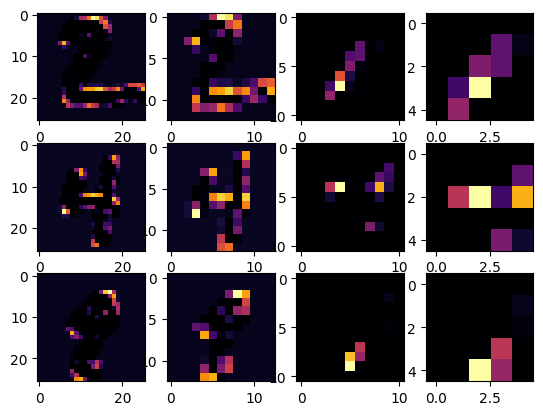

In [22]:
# Create a 3x4 grid of subplots for visualization
f, axarr = plt.subplots(3, 4)

# Image indices and convolution layer number
FIRST_IMAGE = 1
SECOND_IMAGE = 19
THIRD_IMAGE = 78
CONVOLUTION_NUMBER = 1

# Construct a custom model to visualize intermediate layer outputs
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Visualize convolutions for three random images
for x in range(0, 4):
    # Extract and visualize convolution activations for the first image
    f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0, x].grid(False)

    # Extract and visualize convolution activations for the second image
    f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1, x].grid(False)

    # Extract and visualize convolution activations for the third image
    f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2, x].grid(False)
